# Import

In [1]:
# Import cell 
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
def save_excel(file, path, file_name, file_type):
    with pd.ExcelWriter(f'{path}/{file_name}.{file_type}', engine = 'openpyxl') as writer:
        for sheet_name, df in file.items():
            df.to_excel(writer, sheet_name = sheet_name, index = False)

In [3]:
!pip install openpyxl

In [4]:
base_path = "/Users/Mahdi/quera_ai/projects/project1/Project1_data"

In [5]:
r1400 = pd.read_excel(base_path + "/R1400.xlsx", sheet_name=None, engine = 'openpyxl')

In [6]:
R1400 = r1400.copy()

In [7]:
file_list = [r1400]
file_names = ['R1400']

# R1400Data

In [8]:
print(r1400['R1400Data'].columns)
r1400['R1400Data'] = r1400['R1400Data'][['Address', 'Fasl', 'weight', 'khanevartype', 'province','town']]

Index(['Address', 'Fasl', 'weight', 'khanevartype', 'Takmil', 'TakmilDescA',
       'TakmilDescB', 'TakmilDescC', 'Jaygozin', 'JaygozinDescA',
       'JaygozinDescB', 'JaygozinDescC', 'BlkAbdJaygozin', 'RadifJaygozin',
       'IsTel', 'FVam', 'province', 'town'],
      dtype='object')


In [9]:
r1400['R1400Data'].isna().mean()*100

Address         0.0
Fasl            0.0
weight          0.0
khanevartype    0.0
province        0.0
town            0.0
dtype: float64

# R1400P1

In [10]:
r1400['R1400P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           8.283046
studying          26.216414
degree            26.214826
occupationalst    15.611700
maritalst         15.610112
dtype: float64

In [11]:
r1400['R1400P1']['age'] = r1400['R1400P1']['age'].astype(int)

In [12]:
max_age_illiterate = max(r1400['R1400P1'][r1400['R1400P1']['literacy'].isna()]['age'])
print(max_age_illiterate)
if max_age_illiterate > 6:
    max_age_illiterate = 6
r1400['R1400P1'].loc[(r1400['R1400P1']['literacy'].isna()) & (r1400['R1400P1']['age'] <= max_age_illiterate), 'literacy'] = 'illiterate'
r1400['R1400P1'].loc[(r1400['R1400P1']['studying'].isna()) & (r1400['R1400P1']['age'] <= max_age_illiterate), 'studying'] = 'No'

6


In [13]:
r1400['R1400P1'].loc[(r1400['R1400P1']['studying'].isna()) & (r1400['R1400P1']['literacy'] == 'illiterate'), 'studying'] = 'No'

In [14]:
r1400['R1400P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           0.000000
studying           0.000000
degree            26.214826
occupationalst    15.611700
maritalst         15.610112
dtype: float64

In [15]:
r1400['R1400P1'].loc[(r1400['R1400P1']['studying'] == 'No') & (r1400['R1400P1']['degree'] == 'Other') & (r1400['R1400P1']['literacy'] == 'illiterate')]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst


In [16]:
r1400['R1400P1'].loc[(r1400['R1400P1']['literacy'] == 'illiterate'), 'degree'].value_counts()

degree
Diploma    1
Name: count, dtype: int64

In [17]:
r1400['R1400P1'].loc[(r1400['R1400P1']['literacy'] == 'illiterate'), 'degree'] = 'No degree'

In [18]:
r1400['R1400P1'].isna().mean()*100

Address            0.000000
member             0.000000
relation           0.000000
gender             0.000000
age                0.000000
literacy           0.000000
studying           0.000000
degree             0.000000
occupationalst    15.611700
maritalst         15.610112
dtype: float64

In [19]:
r1400['R1400P1'].loc[r1400['R1400P1']['occupationalst'].isna(), 'occupationalst'] = 'Other'

In [20]:
r1400['R1400P1']['maritalst'].value_counts()

maritalst
Married     31933
Single      17359
Widowed      3270
Divorced      580
Name: count, dtype: int64

In [21]:
r1400['R1400P1'].loc[(r1400['R1400P1']['maritalst'].isna())]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
2,20001384220,3,Child,Female,4,illiterate,No,No degree,Other,NaN
29,20007391823,3,Child,Female,5,illiterate,No,No degree,Other,NaN
87,20011394625,4,Child,Male,6,literate,Yes,Elemantry,Other,NaN
91,20007391820,4,Child,Female,6,literate,Yes,Elemantry,Other,NaN
114,20011395435,3,Child,Male,8,literate,Yes,Elemantry,Other,NaN
...,...,...,...,...,...,...,...,...,...,...
62905,23006709827,5,Child,Female,9,literate,Yes,Elemantry,Other,NaN
62906,23006709827,6,Child,Male,5,illiterate,No,No degree,Other,NaN
62918,23002704235,4,Child,Male,9,literate,Yes,Elemantry,Other,NaN
62922,23002704229,4,Child,Female,8,literate,Yes,Elemantry,Other,NaN


In [22]:
max_age_single = max(r1400['R1400P1'].loc[(r1400['R1400P1']['maritalst'].isna()), 'age'])
r1400['R1400P1'].loc[(r1400['R1400P1']['maritalst'].isna()) & (r1400['R1400P1']['relation'] == 'Child'), 'maritalst'] = 'Single'

In [23]:
r1400['R1400P1'].loc[(r1400['R1400P1']['maritalst'].isna()) & (r1400['R1400P1']['age'] <= max_age_single), 'maritalst'] = 'Single'

In [24]:
r1400['R1400P1'].isna().mean()*100

Address           0.0
member            0.0
relation          0.0
gender            0.0
age               0.0
literacy          0.0
studying          0.0
degree            0.0
occupationalst    0.0
maritalst         0.0
dtype: float64

# R1400P2

In [25]:
missing_value_r1400p2 = pd.DataFrame(r1400['R1400P2'].isna().mean()*100)
missing_value_r1400p2 = missing_value_r1400p2.reset_index()
missing_value_r1400p2.columns = ['feature', 'percentage']
missing_value_r1400p2[missing_value_r1400p2['percentage'] > 0]

,feature,percentage
1,tenure,5.562410
4,construction,5.562410
5,material,24.830352
42,cookingfuel,5.562410
43,heatingfuel,7.886079
44,waterheatingfuel,6.801357


In [26]:
cookingfuel_count = pd.DataFrame(r1400['R1400P2']['cookingfuel'].value_counts()).reset_index()
cookingfuel_count.columns = ['cookingfuel', 'count']
common_cookingfuel = cookingfuel_count.iloc[0, 0]

heatingfuel_count = pd.DataFrame(r1400['R1400P2']['heatingfuel'].value_counts()).reset_index()
heatingfuel_count.columns = ['heatingfuel', 'count']
common_heatingfuel = heatingfuel_count.iloc[0, 0]

waterheatingfuel_count = pd.DataFrame(r1400['R1400P2']['waterheatingfuel'].value_counts()).reset_index()
waterheatingfuel_count.columns = ['waterheatingfuel', 'count']
common_waterheatingfuel = waterheatingfuel_count.iloc[0, 0]

In [27]:
r1400['R1400P2'].loc[r1400['R1400P2']['cookingfuel'].isna(), 'cookingfuel'] = common_cookingfuel
r1400['R1400P2'].loc[r1400['R1400P2']['heatingfuel'].isna(), 'heatingfuel'] = common_heatingfuel
r1400['R1400P2'].loc[r1400['R1400P2']['waterheatingfuel'].isna(), 'waterheatingfuel'] = common_waterheatingfuel


In [28]:
missing_value_r1400p2 = pd.DataFrame(r1400['R1400P2'].isna().mean()*100)
missing_value_r1400p2 = missing_value_r1400p2.reset_index()
missing_value_r1400p2.columns = ['feature', 'percentage']
missing_value_r1400p2[missing_value_r1400p2['percentage'] > 0]

,feature,percentage
1,tenure,5.562410
4,construction,5.562410
5,material,24.830352


Question is : Is there any way to fill material ? Is it valuable ?

# R1400P3S01

In [29]:
r1400['R1400P3S01'].isna().mean()*100

Address       0.000000
code          0.000000
purchased     0.000000
gram         74.679738
kilogram     24.001523
price         9.269256
value         0.000000
dtype: float64

In [30]:
print(r1400['R1400P3S01'].columns)

r1400['R1400P3S01'].loc[(r1400['R1400P3S01']['kilogram'].isna()) & (~r1400['R1400P3S01']['price'].isna()), 'kilogram'] = r1400['R1400P3S01']['value'] / r1400['R1400P3S01']['price']


r1400['R1400P3S01'].loc[(~r1400['R1400P3S01']['kilogram'].isna()) & (r1400['R1400P3S01']['price'].isna()), 'price'] = r1400['R1400P3S01']['value'] / r1400['R1400P3S01']['kilogram']


r1400['R1400P3S01'] = r1400['R1400P3S01'].loc[~r1400['R1400P3S01']['kilogram'].isna() | ~r1400['R1400P3S01']['price'].isna()]


Index(['Address', 'code', 'purchased', 'gram', 'kilogram', 'price', 'value'], dtype='object')


In [31]:
print(r1400['R1400P3S01'].isna().mean()*100)

Address       0.000000
code          0.000000
purchased     0.000000
gram         72.094477
kilogram      0.000000
price         0.000000
value         0.000000
dtype: float64


In [32]:
r1400['R1400P3S01'] = r1400['R1400P3S01'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(r1400['R1400P3S01'].columns)


Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# R1400P3S02

In [33]:
r1400['R1400P3S02'].isna().mean()*100


Address        0.000000
code           0.000000
purchased      0.000000
gram         100.000000
kilogram      21.264844
price         21.264844
value          0.000000
dtype: float64

In [34]:
r1400['R1400P3S02']['value'] = pd.to_numeric(r1400['R1400P3S02']['value'], errors='coerce')
r1400['R1400P3S02']['kilogram'] = pd.to_numeric(r1400['R1400P3S02']['kilogram'], errors='coerce')

In [35]:
r1400['R1400P3S02'].loc[(r1400['R1400P3S02']['kilogram'].isna()) & (~r1400['R1400P3S02']['price'].isna()), 'kilogram'] = r1400['R1400P3S02']['value'] / r1400['R1400P3S02']['price']
r1400['R1400P3S02'].loc[(~r1400['R1400P3S02']['kilogram'].isna()) & (r1400['R1400P3S02']['price'].isna()), 'price'] = r1400['R1400P3S02']['value'] / r1400['R1400P3S02']['kilogram']
r1400['R1400P3S02'] = r1400['R1400P3S02'].loc[~r1400['R1400P3S02']['kilogram'].isna() | ~r1400['R1400P3S02']['price'].isna()]

In [36]:
r1400['R1400P3S02'].isna().mean()*100


Address        0.0
code           0.0
purchased      0.0
gram         100.0
kilogram       0.0
price          0.0
value          0.0
dtype: float64

In [37]:
r1400['R1400P3S02'] = r1400['R1400P3S02'][['Address', 'code', 'purchased', 'kilogram', 'value']]
print(r1400['R1400P3S02'].columns)

Index(['Address', 'code', 'purchased', 'kilogram', 'value'], dtype='object')


# R1400P3S04

In [38]:
r1400['R1400P3S04'].isna().mean()*100

Address       0.000000
code          0.000000
mortgage     99.057583
purchased    23.097873
value         0.000000
dtype: float64

Question is : Is there any way to fill purchased & mortgage ?

In [39]:
r1400['R1400P3S04']['purchased'].value_counts()

purchased
1    51407
8     1382
2      305
5      192
3       57
        13
7        6
6        5
Name: count, dtype: int64

In [40]:
r1400['R1400P3S04'].loc[(r1400['R1400P3S04']['purchased'].isna()) & (~r1400['R1400P3S04']['mortgage'].isna())]

,Address,code,mortgage,purchased,value


In [41]:
r1400['R1400P3S04'].loc[r1400['R1400P3S04']['purchased'].isna(), 'code'].value_counts()

code
42111    15986
42211       43
Name: count, dtype: int64

In [42]:
pd.set_option('display.max_rows', None)
grouped = r1400['R1400P3S04'].groupby('Address').filter(lambda x: ((x['code'] == 41111).any()) | ((x['code'] == 41112).any()))
print(grouped[((grouped.code == 41111) | (grouped.code == 41111) | (grouped.code == 42111) | (grouped.code == 42211))])
pd.reset_option('display.max_rows')

           Address   code  mortgage purchased     value
182    20009393020  41111       NaN         1   1100000
279    20006389432  41111       NaN         1   5000000
410    20001384621  41111       NaN         1  10000000
636    20001384632  41111       NaN         1   9000000
979    20102398826  41111       NaN         1   5000000
1325   20205408729  41111       NaN         1  12000000
1613   20208410329  41111       NaN         1   5000000
1679   20208410326  41111       NaN         1   6000000
1710   20210410729  41111       NaN         1   6000000
1751   20205408326  41111       NaN         1  25000000
1772   20206409126  41111       NaN         1   5000000
2495   20510448323  41111       NaN         1   1700000
2520   20503442320  41111       NaN         1   3500000
2563   20513450120  41111       NaN         1   5000000
2574   20502441129  41111       NaN         1   3000000
2611   20502441120  41111       NaN         1   3000000
2687   20502441126  41111       NaN         1   

# R1400P3S[03 + 05 - 12]

In [43]:
# All files are clean except R1400P3S10
# R1400P3S10 is empty

r1400['R1400P3S10']

,Address,code,purchased,value


# R1400P3S13

In [44]:
print(r1400['R1400P3S13'].isna().mean()*100)
print(f"len r1400['R1400P3S13'] = {len(r1400['R1400P3S13'])}")
print(f"len nan value in r1400['R1400P3S13'] = {len(r1400['R1400P3S13'][r1400['R1400P3S13']['value'].isna()])}")
r1400['R1400P3S13'][r1400['R1400P3S13']['value'].isna()]

Address    0.000000
code       0.000000
value      0.222056
dtype: float64
len r1400['R1400P3S13'] = 180585
len nan value in r1400['R1400P3S13'] = 401


,Address,code,value
317,20013397021,123111,NaN
441,20002385828,123111,NaN
625,20002385832,51212,NaN
654,20006389424,123111,NaN
680,20006389432,123111,NaN
...,...,...,...
176935,22807686325,93411,NaN
178506,22906695232,71116,NaN
178816,22907695626,123111,NaN
179690,23002703835,123111,NaN


Fill Null values with median

In [45]:
r1400['R1400P3S13'].loc[r1400['R1400P3S13']['value'] == '          ', 'value'] = None
r1400['R1400P3S13']['value'] = r1400['R1400P3S13']['value'].astype('float64')
p3s13_median = r1400['R1400P3S13'][~r1400['R1400P3S13']['value'].isna()]['value'].median()
r1400['R1400P3S13']['value'] = r1400['R1400P3S13']['value'].fillna(p3s13_median)

Question is : Is there any way to fill value ?

# R1400P3S14

In [46]:
r1400['R1400P3S14'].isna().mean()*100

Address      0.000000
code         0.000000
purchased    5.680120
value        6.028899
dtype: float64

Question is : Is there any way to fill purchased & value ?

# R1400P4S01

In [47]:
r1400['R1400P4S01'].isna().mean()*100

Address            0.000000
member             0.000000
employed_w         0.000000
ISCO_w             0.000000
ISIC_w             0.000000
status_w           0.000000
hours_w            8.806262
days_w             8.796943
income_w_m         0.000000
income_w_y         0.000000
wage_w_m           0.121144
wage_w_y           0.046594
perk_w_m           0.093188
perk_w_y           0.046594
netincome_w_m      0.000000
netincome_w_y      0.000000
Fasl               0.000000
year               0.000000
DYCOL00          100.000000
dtype: float64

In [48]:
R1400_P4S01_mahdi = r1400['R1400P4S01'][['Address', 'member', 'employed_w', 'ISCO_w', 'ISIC_w', 'status_w' , 'hours_w', 'days_w','income_w_y', 'wage_w_y', 'perk_w_y', 'netincome_w_y', 'Fasl', 'year']]
R1400_P4S01_mahdi.isna().mean()*100

Address          0.000000
member           0.000000
employed_w       0.000000
ISCO_w           0.000000
ISIC_w           0.000000
status_w         0.000000
hours_w          8.806262
days_w           8.796943
income_w_y       0.000000
wage_w_y         0.046594
perk_w_y         0.046594
netincome_w_y    0.000000
Fasl             0.000000
year             0.000000
dtype: float64

In [49]:
print(R1400_P4S01_mahdi[R1400_P4S01_mahdi['wage_w_y'].isna()].index)
print(R1400_P4S01_mahdi[R1400_P4S01_mahdi['perk_w_y'].isna()].index)
R1400_P4S01_mahdi[(R1400_P4S01_mahdi['perk_w_y'].isna()) | (R1400_P4S01_mahdi['wage_w_y'].isna())]

Index([1092, 1100, 1101, 1102, 1103], dtype='int64')
Index([1092, 1100, 1101, 1102, 1103], dtype='int64')


,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
1092,21202529129,1,1,8341,1610,3,5.0,6.0,80000000,NaN,NaN,80000000,1,1401
1100,21202529529,2,1,1324,8100,3,8.0,7.0,40000000,NaN,NaN,40000000,1,1401
1101,21202529132,1,1,1115,84110,1,5.0,7.0,168000000,NaN,NaN,168000000,1,1401
1102,21202529135,3,1,7231,45200,3,8.0,6.0,120000000,NaN,NaN,120000000,1,1401
1103,21202529126,1,1,9212,1620,3,8.0,7.0,150000000,NaN,NaN,150000000,1,1401


In [50]:
R1400_P4S01_mahdi = R1400_P4S01_mahdi[~R1400_P4S01_mahdi['hours_w'].isna()]
R1400_P4S01_mahdi = R1400_P4S01_mahdi[~R1400_P4S01_mahdi['days_w'].isna()]

In [51]:
X = R1400_P4S01_mahdi[(~R1400_P4S01_mahdi['perk_w_y'].isna()) & (~R1400_P4S01_mahdi['wage_w_y'].isna())].drop(['Address', 'member', 'wage_w_y', 'perk_w_y'], axis = 1)
y1 = R1400_P4S01_mahdi[(~R1400_P4S01_mahdi['perk_w_y'].isna()) & (~R1400_P4S01_mahdi['wage_w_y'].isna())]['wage_w_y']
y2 = R1400_P4S01_mahdi[(~R1400_P4S01_mahdi['perk_w_y'].isna()) & (~R1400_P4S01_mahdi['wage_w_y'].isna())]['perk_w_y']

X_train, X_validation, y1_train, y1_validation = train_test_split(X, y1, test_size=0.25, random_state=42)
X_train, X_validation, y2_train, y2_validation = train_test_split(X, y2, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y1_train)
y1_pred_validation = model.predict(X_validation)
mean_squared_error_1 = mean_squared_error(y1_validation, y1_pred_validation)
r2_score_1 = r2_score(y1_validation, y1_pred_validation)
print("--- wage_w_y ---")
print(f"mean_squared_error = {mean_squared_error_1}")
print(f"r2_score = {r2_score_1}")

model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- RandomForestRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

model = GradientBoostingRegressor()
model.fit(X_train, y2_train)
y2_pred_validation = model.predict(X_validation)
mean_squared_error_2 = mean_squared_error(y2_validation, y2_pred_validation)
r2_score_2 = r2_score(y2_validation, y2_pred_validation)
print("--- perk_w_y ---")
print("--- GradientBoostingRegressor ---")
print(f"mean_squared_error = {mean_squared_error_2}")
print(f"r2_score = {r2_score_2}")

--- wage_w_y ---
mean_squared_error = 1940398639402400.8
r2_score = 0.962401925361071
--- perk_w_y ---
--- RandomForestRegressor ---
mean_squared_error = 787435518501691.0
r2_score = 0.21331783140982108
--- perk_w_y ---
--- GradientBoostingRegressor ---
mean_squared_error = 793218826427625.8
r2_score = 0.2075400564506017


In [52]:
R1400_P4S01_mahdi = R1400_P4S01_mahdi.loc[(~R1400_P4S01_mahdi['perk_w_y'].isna()) | (~R1400_P4S01_mahdi['wage_w_y'].isna())]

# R1400P4S02

In [53]:
r1400['R1400P4S02'].isna().mean()*100

Address              0.000000
member               0.000000
employed_s           0.000000
ISCO_s               0.000000
ISIC_s               0.000000
status_s             0.000000
agriculture          0.000000
hours_s              1.115303
days_s               1.139905
cost_employment     11.374446
cost_raw             2.517632
cost_machinery      10.546170
cost_others          5.724127
cost_tax            14.195506
sale                 1.681155
income_s_y           0.000000
Fasl                 0.000000
year                 0.000000
DYCOL00            100.000000
dtype: float64

In [54]:
r1400['R1400P4S02'].columns

Index(['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s',
       'agriculture', 'hours_s', 'days_s', 'cost_employment', 'cost_raw',
       'cost_machinery', 'cost_others', 'cost_tax', 'sale', 'income_s_y',
       'Fasl', 'year', 'DYCOL00'],
      dtype='object')

In [55]:
R1400_P4S02_mahdi = r1400['R1400P4S02'][['Address', 'member', 'employed_s', 'ISCO_s', 'ISIC_s', 'status_s', 'agriculture', 'sale', 'income_s_y', 'Fasl', 'year']]
R1400_P4S02_mahdi = R1400_P4S02_mahdi[(~R1400_P4S02_mahdi['employed_s'].isna()) & (~R1400_P4S02_mahdi['ISCO_s'].isna()) & (~R1400_P4S02_mahdi['ISIC_s'].isna()) & (~R1400_P4S02_mahdi['status_s'].isna()) & (~R1400_P4S02_mahdi['agriculture'].isna())]

In [56]:
R1400_P4S02_mahdi.isna().mean()*100

Address        0.000000
member         0.000000
employed_s     0.000000
ISCO_s         0.000000
ISIC_s         0.000000
status_s       0.000000
agriculture    0.000000
sale           1.681155
income_s_y     0.000000
Fasl           0.000000
year           0.000000
dtype: float64

In [57]:
print(len(R1400_P4S02_mahdi[R1400_P4S02_mahdi['sale'].isna()]))
print(len(R1400_P4S02_mahdi[R1400_P4S02_mahdi['sale'] == 0]))
print(len(R1400_P4S02_mahdi[R1400_P4S02_mahdi['income_s_y'].isna()]))
print(len(R1400_P4S02_mahdi[R1400_P4S02_mahdi['income_s_y'] == 0]))


205
2239
0
2312


In [58]:
R1400_P4S02_mahdi[(R1400_P4S02_mahdi['sale'] == 0) | (R1400_P4S02_mahdi['sale'].isna())]['employed_s'].value_counts()

employed_s
1    2422
2      22
Name: count, dtype: int64

In [59]:
R1400_P4S02_mahdi[(R1400_P4S02_mahdi['income_s_y'] == 0) | (R1400_P4S02_mahdi['income_s_y'].isna())]['employed_s'].value_counts()

employed_s
1    2291
2      21
Name: count, dtype: int64

In [60]:
R1400_P4S02_mahdi.loc[((R1400_P4S02_mahdi['income_s_y'] == 0) | (R1400_P4S02_mahdi['income_s_y'].isna())) & (R1400_P4S02_mahdi['employed_s'] == 2), 'income_s_y'] = 0
R1400_P4S02_mahdi.loc[((R1400_P4S02_mahdi['sale'] == 0) | (R1400_P4S02_mahdi['sale'].isna())) & (R1400_P4S02_mahdi['employed_s'] == 2), 'sale'] = 0

In [61]:
X = R1400_P4S02_mahdi[~R1400_P4S02_mahdi['sale'].isna()].drop(['Address', 'member', 'sale'], axis = 1)
y1 = R1400_P4S02_mahdi[~R1400_P4S02_mahdi['sale'].isna()]['sale']
X_train, X_validation, y_train, y_validation = train_test_split(X, y1, test_size=0.25, random_state=42)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

model = model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
model.fit(X_train, y_train)
y_pred_validation = model.predict(X_validation)
r2 = r2_score(y_validation, y_pred_validation)
print(f"r2_score = {r2}")

r2_score = 0.5723230910995993
r2_score = 0.6099883065997613
r2_score = 0.1958326345440281
r2_score = 0.47863012265035854


In [62]:
R1400_P4S02_mahdi = R1400_P4S02_mahdi[~R1400_P4S02_mahdi['sale'].isna()]

# R1400P4S03

In [63]:
r1400['R1400P4S03'].isna().mean()*100

Address              0.000000
member               0.000000
income_pension      70.566203
income_rent         76.084791
income_interest     27.792166
income_aid          27.286130
income_resale       77.770251
income_transfer     66.219070
Fasl                 0.000000
year                 0.000000
DYCOL00            100.000000
dtype: float64

In [64]:
r1400_P4S03_mahdi = r1400['R1400P4S03'].drop(['DYCOL00'], axis = 1)

# R1400_P4S04

In [65]:
r1400['R1400P4S04'].isna().mean()*100

Address             0.000000
member              0.000000
subsidy_number      0.012479
subsidy_month       0.003120
subsidy             0.000000
Fasl                0.000000
year                0.000000
DYCOL00           100.000000
dtype: float64

In [66]:
r1400_P4S04_mahdi = r1400['R1400P4S04'].drop(['DYCOL00'], axis = 1)

# Mahdi's Files

In [67]:
R1400_P4S01_mahdi
R1400_P4S02_mahdi
r1400_P4S03_mahdi
r1400_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,20001384225,1,1.0,12.0,1960000,1,1401
1,20001384225,2,2.0,12.0,10920000,1,1401
2,20001384232,1,1.0,12.0,1960000,1,1401
3,20001384232,2,2.0,12.0,10920000,1,1401
4,20001384235,1,1.0,12.0,1960000,1,1401
...,...,...,...,...,...,...,...
32048,23006709032,1,3.0,12.0,16380000,4,1401
32049,23005707824,1,1.0,12.0,5460000,4,1401
32050,23001701430,1,3.0,12.0,10920000,4,1401
32051,23001700632,1,1.0,12.0,1260000,4,1401


# R1400_P4S01

In [68]:
R1400_P4S01_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9779 entries, 0 to 10730
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        9779 non-null   int64  
 1   member         9779 non-null   int64  
 2   employed_w     9779 non-null   int64  
 3   ISCO_w         9779 non-null   int64  
 4   ISIC_w         9779 non-null   int64  
 5   status_w       9779 non-null   int64  
 6   hours_w        9779 non-null   float64
 7   days_w         9779 non-null   float64
 8   income_w_y     9779 non-null   int64  
 9   wage_w_y       9779 non-null   float64
 10  perk_w_y       9779 non-null   float64
 11  netincome_w_y  9779 non-null   int64  
 12  Fasl           9779 non-null   int64  
 13  year           9779 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 1.1 MB


In [69]:
print(R1400_P4S01_mahdi.shape)
test_duplicate = R1400_P4S01_mahdi.drop_duplicates()
print(test_duplicate.shape)

(9779, 14)
(9779, 14)


In [70]:
R1400_P4S01_mahdi_employed_no_income = R1400_P4S01_mahdi[(R1400_P4S01_mahdi['employed_w'] == 1) & (R1400_P4S01_mahdi['netincome_w_y'] == 0)]
R1400_P4S01_mahdi_unemployed_with_income = R1400_P4S01_mahdi[(R1400_P4S01_mahdi['employed_w'] == 2) & (R1400_P4S01_mahdi['netincome_w_y'] != 0)]

print(len(R1400_P4S01_mahdi))
print(len(R1400_P4S01_mahdi_employed_no_income))
print(len(R1400_P4S01_mahdi_unemployed_with_income))

9779
13
201


وضعیت اشتغال و حقوق گرفتن یکسری ناهماهنگی داره

In [71]:
R1400_P4S01_mahdi_employed_no_income_condition = (R1400_P4S01_mahdi['employed_w'] == 1) & (R1400_P4S01_mahdi['netincome_w_y'] == 0)
R1400_P4S01_mahdi_unemployed_with_income_condition = (R1400_P4S01_mahdi['employed_w'] == 2) & (R1400_P4S01_mahdi['netincome_w_y'] != 0)

R1400_P4S01_mahdi_clean = R1400_P4S01_mahdi[~(R1400_P4S01_mahdi_employed_no_income_condition | R1400_P4S01_mahdi_unemployed_with_income_condition)]
R1400_P4S01_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9565 entries, 0 to 10730
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Address        9565 non-null   int64  
 1   member         9565 non-null   int64  
 2   employed_w     9565 non-null   int64  
 3   ISCO_w         9565 non-null   int64  
 4   ISIC_w         9565 non-null   int64  
 5   status_w       9565 non-null   int64  
 6   hours_w        9565 non-null   float64
 7   days_w         9565 non-null   float64
 8   income_w_y     9565 non-null   int64  
 9   wage_w_y       9565 non-null   float64
 10  perk_w_y       9565 non-null   float64
 11  netincome_w_y  9565 non-null   int64  
 12  Fasl           9565 non-null   int64  
 13  year           9565 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 1.1 MB


In [72]:
R1400_P4S01_family_netincome = R1400_P4S01_mahdi_clean[['Address', 'netincome_w_y']]
R1400_P4S01_family_netincome = R1400_P4S01_family_netincome.groupby('Address')['netincome_w_y'].sum().reset_index()
R1400_P4S01_family_netincome['Address'].is_unique
len(R1400_P4S01_family_netincome)

8016

# R1400_P4S02

In [73]:
R1400_P4S02_mahdi

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,20001384232,1,1,6111,1110,5,1,9.700000e+08,797000000,1,1401
1,20011394623,1,1,6111,1110,5,1,2.050000e+08,73500000,1,1401
2,20011394623,1,1,6121,1440,5,1,3.600000e+08,173000000,1,1401
4,20003387029,1,1,6112,1240,4,1,2.450000e+08,99000000,1,1401
5,20003387029,1,1,6121,1440,4,1,2.225000e+09,420000000,1,1401
...,...,...,...,...,...,...,...,...,...,...,...
12189,23002703032,1,1,3324,52290,5,2,9.720000e+08,960000000,4,1401
12190,23003706625,1,1,5224,47212,5,2,1.080000e+09,1080000000,4,1401
12191,23003706635,1,1,7111,41000,5,2,7.800000e+08,780000000,4,1401
12192,23004705026,1,1,3334,68200,5,2,4.020000e+09,3600000000,4,1401


In [74]:
print(R1400_P4S02_mahdi.shape)
test_duplicate = R1400_P4S02_mahdi.drop_duplicates()
print(test_duplicate.shape)

(11990, 11)
(11989, 11)


In [75]:
R1400_P4S02_mahdi_employed_no_income = R1400_P4S02_mahdi[(R1400_P4S02_mahdi['employed_s'] == 1) & (R1400_P4S02_mahdi['income_s_y'] == 0)]
R1400_P4S02_mahdi_unemployed_with_income = R1400_P4S02_mahdi[(R1400_P4S02_mahdi['employed_s'] == 2) & (R1400_P4S02_mahdi['income_s_y'] != 0)]

print(len(R1400_P4S02_mahdi))
print(len(R1400_P4S02_mahdi_employed_no_income))
print(len(R1400_P4S02_mahdi_unemployed_with_income))

11990
2110
152


In [76]:
R1400_P4S02_mahdi_employed_no_income[R1400_P4S02_mahdi_employed_no_income['agriculture']!=2]

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
201,20202407523,2,1,6121,1411,6,1,0.0,0,1,1401
210,20205408720,2,1,9211,1230,6,1,0.0,0,1,1401
303,20316423929,3,1,6121,1440,6,1,0.0,0,1,1401
306,20323426328,3,1,6121,1440,6,1,0.0,0,1,1401
328,20323426320,2,1,6111,1110,6,1,0.0,0,1,1401
...,...,...,...,...,...,...,...,...,...,...,...
12104,22903691635,2,1,6121,1440,6,1,0.0,0,4,1401
12106,22905694020,2,1,6121,1440,6,1,0.0,0,4,1401
12108,22905694035,2,1,6121,1440,6,1,0.0,0,4,1401
12109,22906695232,1,1,6121,1440,5,1,250000000.0,0,4,1401


In [77]:
test_employment_income = r1400['R1400P4S02']

In [78]:
R1400_P4S02_mahdi_employed_no_income_test = test_employment_income[(test_employment_income['employed_s'] == 1) & (test_employment_income['income_s_y'] == 0)]
R1400_P4S02_selected_columns = R1400_P4S02_mahdi_employed_no_income_test[['cost_employment', 'cost_raw', 'cost_machinery', 'cost_others', 'sale','income_s_y']]
# R1400_P4S02_mahdi_employed_no_income_test.info()
num_zero_or_nan_cost_raw = ((R1400_P4S02_selected_columns['cost_others'] == 0) | R1400_P4S02_selected_columns['cost_others'].isna()).sum()
print(len(R1400_P4S02_mahdi_employed_no_income_test))
print(num_zero_or_nan_cost_raw)



2291
2287


In [79]:
not_zero_not_nan_cost_raw = R1400_P4S02_selected_columns[(R1400_P4S02_selected_columns['cost_others'] != 0) & R1400_P4S02_selected_columns['cost_others'].notna()]
print(not_zero_not_nan_cost_raw)
print(len(not_zero_not_nan_cost_raw))

       cost_employment    cost_raw  cost_machinery  cost_others        sale  \
6352               0.0  25000000.0             0.0   39000000.0  64000000.0   
9766         5000000.0  15000000.0             0.0   10000000.0  30000000.0   
10289              0.0  50000000.0             0.0   30000000.0  80000000.0   
11649              0.0  10000000.0       5000000.0    5000000.0  20000000.0   

       income_s_y  
6352            0  
9766            0  
10289           0  
11649           0  
4


In [80]:
R1400_P4S02_mahdi_employed_no_income_condition = (R1400_P4S02_mahdi['employed_s'] == 1) & (R1400_P4S02_mahdi['income_s_y'] == 0)
R1400_P4S02_mahdi_unemployed_with_income_condition = (R1400_P4S02_mahdi['employed_s'] == 2) & (R1400_P4S02_mahdi['income_s_y'] != 0)

R1400_P4S02_mahdi_clean = R1400_P4S02_mahdi[~(R1400_P4S02_mahdi_employed_no_income_condition | R1400_P4S02_mahdi_unemployed_with_income_condition)]
R1400_P4S02_mahdi_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9728 entries, 0 to 12192
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      9728 non-null   int64  
 1   member       9728 non-null   int64  
 2   employed_s   9728 non-null   int64  
 3   ISCO_s       9728 non-null   int64  
 4   ISIC_s       9728 non-null   int64  
 5   status_s     9728 non-null   int64  
 6   agriculture  9728 non-null   int64  
 7   sale         9728 non-null   float64
 8   income_s_y   9728 non-null   int64  
 9   Fasl         9728 non-null   int64  
 10  year         9728 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 912.0 KB


In [81]:
R1400_P4S02_family_netincome = R1400_P4S02_mahdi_clean[['Address', 'income_s_y']]
R1400_P4S02_family_netincome = R1400_P4S02_family_netincome.groupby('Address')['income_s_y'].sum().reset_index()
R1400_P4S02_family_netincome['Address'].is_unique
len(R1400_P4S02_family_netincome)

7389

# R1400_P4S03

In [82]:
r1400_P4S03_mahdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25097 entries, 0 to 25096
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          25097 non-null  int64  
 1   member           25097 non-null  int64  
 2   income_pension   7387 non-null   object 
 3   income_rent      6002 non-null   object 
 4   income_interest  18122 non-null  float64
 5   income_aid       18249 non-null  float64
 6   income_resale    5579 non-null   float64
 7   income_transfer  8478 non-null   float64
 8   Fasl             25097 non-null  int64  
 9   year             25097 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 1.9+ MB


In [83]:
print(r1400_P4S03_mahdi.shape)
test_duplicate = r1400_P4S03_mahdi.drop_duplicates()
print(test_duplicate.shape)

(25097, 10)
(25097, 10)


In [84]:
r1400_P4S03_mahdi.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,20001384225,1,NaN,NaN,NaN,25600000.0,NaN,NaN,1,1401
1,20001384232,1,NaN,NaN,NaN,25600000.0,NaN,NaN,1,1401
2,20001384235,1,NaN,0300000000,240000000.0,20800000.0,NaN,NaN,1,1401
3,20011394620,1,NaN,NaN,20640000.0,20000000.0,NaN,NaN,1,1401
4,20011394623,1,NaN,NaN,17000000.0,10000000.0,NaN,NaN,1,1401


In [85]:
R1400_P4S03_family_netincome = r1400_P4S03_mahdi.copy()
R1400_P4S03_family_netincome['income_pension'] = pd.to_numeric(R1400_P4S03_family_netincome['income_pension'], errors='coerce')
R1400_P4S03_family_netincome['income_rent'] = pd.to_numeric(R1400_P4S03_family_netincome['income_rent'], errors='coerce')
R1400_P4S03_family_netincome['income_transfer'] = pd.to_numeric(R1400_P4S03_family_netincome['income_transfer'], errors='coerce')
R1400_P4S03_family_netincome['income_resale'] = pd.to_numeric(R1400_P4S03_family_netincome['income_resale'], errors='coerce')
R1400_P4S03_family_netincome['income_interest'] = pd.to_numeric(R1400_P4S03_family_netincome['income_interest'], errors='coerce')


In [86]:
R1400_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25097 entries, 0 to 25096
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          25097 non-null  int64  
 1   member           25097 non-null  int64  
 2   income_pension   7385 non-null   float64
 3   income_rent      6000 non-null   float64
 4   income_interest  18122 non-null  float64
 5   income_aid       18249 non-null  float64
 6   income_resale    5579 non-null   float64
 7   income_transfer  8478 non-null   float64
 8   Fasl             25097 non-null  int64  
 9   year             25097 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 1.9 MB


In [87]:
R1400_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,20001384225,1,NaN,NaN,NaN,25600000.0,NaN,NaN,1,1401
1,20001384232,1,NaN,NaN,NaN,25600000.0,NaN,NaN,1,1401
2,20001384235,1,NaN,300000000.0,240000000.0,20800000.0,NaN,NaN,1,1401
3,20011394620,1,NaN,NaN,20640000.0,20000000.0,NaN,NaN,1,1401
4,20011394623,1,NaN,NaN,17000000.0,10000000.0,NaN,NaN,1,1401


In [88]:
R1400_P4S03_family_netincome['total_income'] = (
    R1400_P4S03_family_netincome['income_pension'].fillna(0) +
    R1400_P4S03_family_netincome['income_rent'].fillna(0) +
    R1400_P4S03_family_netincome['income_interest'].fillna(0) +
    R1400_P4S03_family_netincome['income_aid'].fillna(0) +
    R1400_P4S03_family_netincome['income_resale'].fillna(0) +
    R1400_P4S03_family_netincome['income_transfer'].fillna(0)
)
R1400_P4S03_family_netincome.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year,total_income
0,20001384225,1,NaN,NaN,NaN,25600000.0,NaN,NaN,1,1401,25600000.0
1,20001384232,1,NaN,NaN,NaN,25600000.0,NaN,NaN,1,1401,25600000.0
2,20001384235,1,NaN,300000000.0,240000000.0,20800000.0,NaN,NaN,1,1401,560800000.0
3,20011394620,1,NaN,NaN,20640000.0,20000000.0,NaN,NaN,1,1401,40640000.0
4,20011394623,1,NaN,NaN,17000000.0,10000000.0,NaN,NaN,1,1401,27000000.0


In [89]:
R1400_P4S03_family_netincome.shape

(25097, 11)

In [90]:
R1400_P4S03_family_netincome = R1400_P4S03_family_netincome[['Address', 'total_income']]
R1400_P4S03_family_netincome = R1400_P4S03_family_netincome.groupby('Address')['total_income'].sum().reset_index()
R1400_P4S03_family_netincome.shape

(17276, 2)

In [91]:
R1400_P4S03_family_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17276 entries, 0 to 17275
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       17276 non-null  int64  
 1   total_income  17276 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 270.1 KB


# R1400_P4S04

In [92]:
R1400_P4S04_family_netincome = r1400_P4S04_mahdi.copy()
R1400_P4S04_family_netincome.info()
print(R1400_P4S04_family_netincome.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32053 entries, 0 to 32052
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         32053 non-null  int64  
 1   member          32053 non-null  int64  
 2   subsidy_number  32049 non-null  float64
 3   subsidy_month   32052 non-null  float64
 4   subsidy         32053 non-null  int64  
 5   Fasl            32053 non-null  int64  
 6   year            32053 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.7 MB
(32053, 7)


In [93]:
R1400_P4S04_family_netincome = R1400_P4S04_family_netincome[['Address', 'subsidy']]
R1400_P4S04_family_netincome = R1400_P4S04_family_netincome.groupby('Address')['subsidy'].sum().reset_index()
R1400_P4S04_family_netincome.shape

(17811, 2)

# net income sources

In [94]:
R1400_P4S01_family_netincome_column = R1400_P4S01_family_netincome.rename(columns={'netincome_w_y': 'netincome'})
R1400_P4S02_family_netincome_column = R1400_P4S02_family_netincome.rename(columns={'income_s_y': 'netincome'})
R1400_P4S03_family_netincome_column = R1400_P4S03_family_netincome.rename(columns={'total_income': 'netincome'})
R1400_P4S04_family_netincome_column = R1400_P4S04_family_netincome.rename(columns={'subsidy': 'netincome'})
print(R1400_P4S03_family_netincome_column.columns)
# isna??

Index(['Address', 'netincome'], dtype='object')


In [95]:
merged_df_netincome = R1400_P4S01_family_netincome_column.merge(R1400_P4S02_family_netincome_column, on='Address', how='outer', suffixes=('_P4S01', '_P4S02'))

R1400_P4S03_family_netincome_column = R1400_P4S03_family_netincome_column.rename(columns={'netincome': 'netincome_P4S03'})
merged_df_netincome = merged_df_netincome.merge(R1400_P4S03_family_netincome_column, on='Address', how='outer')

R1400_P4S04_family_netincome_column = R1400_P4S04_family_netincome_column.rename(columns={'netincome': 'netincome_P4S04'})
merged_df_netincome = merged_df_netincome.merge(R1400_P4S04_family_netincome_column, on='Address', how='outer')


merged_df_netincome = merged_df_netincome.fillna(0)
merged_df_netincome.head()

merged_df_netincome['total_netincome'] = (
    merged_df_netincome['netincome_P4S01'] +
    merged_df_netincome['netincome_P4S02'] +
    merged_df_netincome['netincome_P4S03'] +
    merged_df_netincome['netincome_P4S04']
)

In [96]:
total_net_income = merged_df_netincome
total_net_income.shape

(18364, 6)

In [97]:
total_net_income.describe()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
count,1.836400e+04,1.836400e+04,1.836400e+04,1.836400e+04,1.836400e+04,1.836400e+04
mean,2.145980e+10,1.901736e+08,1.754373e+08,1.238681e+08,1.492383e+07,5.044029e+08
std,9.080238e+08,2.941201e+08,5.288559e+08,2.119518e+08,8.356147e+06,5.751205e+08
min,2.000138e+10,0.000000e+00,-2.270000e+09,0.000000e+00,0.000000e+00,-1.225221e+09
25%,2.070647e+10,0.000000e+00,0.000000e+00,2.195250e+07,7.070000e+06,2.193200e+08
50%,2.140555e+10,0.000000e+00,0.000000e+00,3.839475e+07,1.638000e+07,4.173310e+08
75%,2.220963e+10,3.400000e+08,2.244000e+08,1.066000e+08,2.037000e+07,6.467825e+08
max,2.300671e+10,3.953000e+09,3.908054e+10,4.994760e+09,8.736000e+07,3.908054e+10


In [98]:
total_net_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18364 entries, 0 to 18363
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18364 non-null  int64  
 1   netincome_P4S01  18364 non-null  float64
 2   netincome_P4S02  18364 non-null  float64
 3   netincome_P4S03  18364 non-null  float64
 4   netincome_P4S04  18364 non-null  float64
 5   total_netincome  18364 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 860.9 KB


In [99]:
total_net_income.head()

,Address,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
0,20001383919,354000000.0,0.0,158600000.0,23100000.0,535700000.0
1,20001383929,160000000.0,0.0,23560000.0,6720000.0,190280000.0
2,20001383935,220000000.0,53000000.0,56560000.0,13545000.0,343105000.0
3,20001384022,624000000.0,0.0,223800000.0,17640000.0,865440000.0
4,20001384029,636000000.0,0.0,30800000.0,23100000.0,689900000.0


In [100]:
# agriculture in urban?

In [101]:
r1400_data = r1400['R1400Data']

In [102]:
r1400_data.describe()

,Address,Fasl,weight,khanevartype,town
count,1.837000e+04,18370.000000,18370.000000,18370.000000,18370.000000
mean,2.145973e+10,2.505498,334.002504,1.001143,7.685193
std,9.079286e+08,1.114540,255.843928,0.033792,6.409529
min,2.000138e+10,1.000000,42.000000,1.000000,1.000000
25%,2.070647e+10,2.000000,144.000000,1.000000,3.000000
50%,2.140555e+10,3.000000,276.000000,1.000000,6.000000
75%,2.220963e+10,3.000000,461.000000,1.000000,10.000000
max,2.300671e+10,4.000000,3757.000000,2.000000,39.000000


In [103]:
r1400_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18370 entries, 0 to 18369
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Address       18370 non-null  int64 
 1   Fasl          18370 non-null  int64 
 2   weight        18370 non-null  int64 
 3   khanevartype  18370 non-null  int64 
 4   province      18370 non-null  object
 5   town          18370 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 861.2+ KB


In [104]:
r1400_data.head()

,Address,Fasl,weight,khanevartype,province,town
0,20001383919,2,169,1,Markazi,1
1,20001383923,2,169,1,Markazi,1
2,20001383925,2,169,1,Markazi,1
3,20001383929,2,169,1,Markazi,1
4,20001383932,2,169,1,Markazi,1


In [105]:
total_income_province = r1400_data.merge(total_net_income, on='Address', how='left')

In [106]:
family_incomes_dataset= total_income_province.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [107]:
family_incomes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18370 entries, 0 to 18369
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18370 non-null  int64  
 1   Fasl             18370 non-null  int64  
 2   weight           18370 non-null  int64  
 3   khanevartype     18370 non-null  int64  
 4   province         18370 non-null  object 
 5   town             18370 non-null  int64  
 6   Hoghugh_Income   18364 non-null  float64
 7   Azad_Income      18364 non-null  float64
 8   Other_Income     18364 non-null  float64
 9   Yarane_Income    18364 non-null  float64
 10  total_netincome  18364 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.5+ MB


In [108]:
family_incomes_dataset.to_csv('family_incomes_dataset.csv', index=False)

In [109]:
total_income_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18370 entries, 0 to 18369
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18370 non-null  int64  
 1   Fasl             18370 non-null  int64  
 2   weight           18370 non-null  int64  
 3   khanevartype     18370 non-null  int64  
 4   province         18370 non-null  object 
 5   town             18370 non-null  int64  
 6   netincome_P4S01  18364 non-null  float64
 7   netincome_P4S02  18364 non-null  float64
 8   netincome_P4S03  18364 non-null  float64
 9   netincome_P4S04  18364 non-null  float64
 10  total_netincome  18364 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.5+ MB


In [110]:
total_income_province.head()
unique_provinces = total_income_province['province'].unique()
print(unique_provinces)

['Markazi' 'Gilan' 'Mazandaran' 'AzarbaijanSharghi' 'AzarbaijanGharbi'
 'Kermanshah' 'Kouzestan' 'Fars' 'Kerman' 'KhorasanRazavi' 'Esfahan'
 'SistanBalouchestan' 'Kordestan' 'Hamedan' 'CharmahalBakhtiari'
 'Lorestan' 'Ilam' 'KohkilouyeBoyerahamad' 'Boushehr' 'Zanjan' 'Semnan'
 'Yazd' 'Hormozgan' 'Tehran' 'Ardebil' 'Qom' 'Qazvin' 'Golestan'
 'KhorasanShomali' 'KhorasanJonoubi' 'Alborz']


In [111]:
rural_chaharmahal_data = total_income_province[total_income_province['province']=='CharmahalBakhtiari']
rural_chaharmahal_data.head()
print(len(rural_chaharmahal_data))
nan_netincome_rows = rural_chaharmahal_data[rural_chaharmahal_data['total_netincome'].isna()]
print(nan_netincome_rows)

491
Empty DataFrame
Columns: [Address, Fasl, weight, khanevartype, province, town, netincome_P4S01, netincome_P4S02, netincome_P4S03, netincome_P4S04, total_netincome]
Index: []


# R1400-CharmahalBakhtiari

In [112]:
rural_chaharmahal_data

,Address,Fasl,weight,khanevartype,province,town,netincome_P4S01,netincome_P4S02,netincome_P4S03,netincome_P4S04,total_netincome
8908,21401545221,2,132,1,CharmahalBakhtiari,1,0.0,0.0,117500000.0,1260000.0,118760000.0
8909,21401545223,2,132,1,CharmahalBakhtiari,1,0.0,140000000.0,71200000.0,6720000.0,217920000.0
8910,21401545225,2,132,1,CharmahalBakhtiari,1,270000000.0,295000000.0,32100000.0,27300000.0,624400000.0
8911,21401545226,2,132,1,CharmahalBakhtiari,1,0.0,220000000.0,190300000.0,9905000.0,420205000.0
8912,21401545232,2,132,1,CharmahalBakhtiari,1,0.0,200000000.0,99250000.0,18900000.0,318150000.0
...,...,...,...,...,...,...,...,...,...,...,...
9394,21409553720,3,116,1,CharmahalBakhtiari,9,400000000.0,0.0,28660000.0,6720000.0,435380000.0
9395,21409553723,3,116,1,CharmahalBakhtiari,9,0.0,440000000.0,94900000.0,24360000.0,559260000.0
9396,21409553726,3,116,1,CharmahalBakhtiari,9,720000000.0,0.0,37760000.0,12180000.0,769940000.0
9397,21409553729,3,116,1,CharmahalBakhtiari,9,200000000.0,280000000.0,44940000.0,17640000.0,542580000.0


In [113]:
family_incomes_chaharmahal_dataset= rural_chaharmahal_data.rename(columns={'netincome_P4S01': 'Hoghugh_Income', 
                                      'netincome_P4S02': 'Azad_Income', 'netincome_P4S03':'Other_Income', 'netincome_P4S04': 'Yarane_Income'})

In [114]:
family_incomes_chaharmahal_dataset.to_csv('family_incomes_chaharmahal_dataset.csv', index=False)

# R1400 Members Income

In [115]:
R1400_P4S01_mahdi_clean

,Address,member,employed_w,ISCO_w,ISIC_w,status_w,hours_w,days_w,income_w_y,wage_w_y,perk_w_y,netincome_w_y,Fasl,year
0,20001384225,1,1,9314,41000,3,9.0,7.0,600000000,600000000.0,0.0,600000000,1,1401
1,20011394620,1,1,9211,1500,3,8.0,3.0,180000000,180000000.0,0.0,180000000,1,1401
2,20001384220,1,1,9314,41000,3,10.0,7.0,576000000,576000000.0,0.0,576000000,1,1401
3,20003387029,1,1,9314,41000,3,8.0,2.0,200000000,200000000.0,0.0,200000000,1,1401
4,20001384223,3,1,9321,22200,3,8.0,6.0,480000000,456000000.0,10000000.0,466000000,1,1401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,23006709832,1,1,2421,84110,3,8.0,6.0,1200000000,924400000.0,180000000.0,1104400000,4,1401
10727,23002703022,4,1,510,84220,1,12.0,6.0,63000000,63000000.0,0.0,63000000,4,1401
10728,23002704225,1,1,9211,1610,3,10.0,7.0,720000000,720000000.0,0.0,720000000,4,1401
10729,23002704225,4,1,9211,1610,3,10.0,7.0,600000000,600000000.0,0.0,600000000,4,1401


In [116]:
# check duplicate records for same members

duplicates = R1400_P4S01_mahdi_clean[R1400_P4S01_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  employed_w  ISCO_w  ISIC_w  status_w  hours_w  \
112    20107401535       1           1    9211    1120         3      6.0   
113    20107401535       1           1    5132   56300         3      5.0   
145    20201406323       1           1    9314   41000         3      9.0   
146    20201406323       1           1    9211    1610         3      9.0   
148    20201406326       1           1    9314   41000         3      9.0   
...            ...     ...         ...     ...     ...       ...      ...   
10330  22604662320       1           1    9314   41000         3      4.0   
10492  22704667320       1           1    5153   81300         3      6.0   
10493  22704667320       1           1    9211    1110         3      8.0   
10618  22904692820       1           1    1115   84110         1      4.0   
10619  22904692820       1           1    9623   35200         3      8.0   

       days_w  income_w_y     wage_w_y  perk_w_y  netincome_w_y  Fasl  year

In [117]:
R1400_P4S02_mahdi_clean

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,sale,income_s_y,Fasl,year
0,20001384232,1,1,6111,1110,5,1,9.700000e+08,797000000,1,1401
1,20011394623,1,1,6111,1110,5,1,2.050000e+08,73500000,1,1401
2,20011394623,1,1,6121,1440,5,1,3.600000e+08,173000000,1,1401
4,20003387029,1,1,6112,1240,4,1,2.450000e+08,99000000,1,1401
5,20003387029,1,1,6121,1440,4,1,2.225000e+09,420000000,1,1401
...,...,...,...,...,...,...,...,...,...,...,...
12188,23002702624,1,1,6121,1440,5,1,3.000000e+08,137000000,4,1401
12189,23002703032,1,1,3324,52290,5,2,9.720000e+08,960000000,4,1401
12190,23003706625,1,1,5224,47212,5,2,1.080000e+09,1080000000,4,1401
12191,23003706635,1,1,7111,41000,5,2,7.800000e+08,780000000,4,1401


In [118]:
# check duplicate records for same members

duplicates = R1400_P4S02_mahdi_clean[R1400_P4S02_mahdi_clean.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  employed_s  ISCO_s  ISIC_s  status_s  agriculture  \
1      20011394623       1           1    6111    1110         5            1   
2      20011394623       1           1    6121    1440         5            1   
4      20003387029       1           1    6112    1240         4            1   
5      20003387029       1           1    6121    1440         4            1   
10     20004388232       1           1    6111    1110         5            1   
...            ...     ...         ...     ...     ...       ...          ...   
12143  22909697635       1           1    6112    1250         5            1   
12184  23002701829       1           1    9314   41000         5            2   
12185  23002701829       1           1    6121    1411         5            1   
12187  23002702624       1           1    8322   49230         5            2   
12188  23002702624       1           1    6121    1440         5            1   

               sale  income

In [119]:
r1400_P4S03_mahdi

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year
0,20001384225,1,NaN,NaN,NaN,25600000.0,NaN,NaN,1,1401
1,20001384232,1,NaN,NaN,NaN,25600000.0,NaN,NaN,1,1401
2,20001384235,1,NaN,0300000000,240000000.0,20800000.0,NaN,NaN,1,1401
3,20011394620,1,NaN,NaN,20640000.0,20000000.0,NaN,NaN,1,1401
4,20011394623,1,NaN,NaN,17000000.0,10000000.0,NaN,NaN,1,1401
...,...,...,...,...,...,...,...,...,...,...
25092,23006709432,1,0,0,460000000.0,0.0,0.0,0.0,4,1401
25093,23006709435,1,0916000000,0,0.0,12360000.0,0.0,0.0,4,1401
25094,23005707824,1,NaN,NaN,NaN,36000000.0,NaN,40000000.0,4,1401
25095,23001701432,1,0,0,0.0,16560000.0,0.0,0.0,4,1401


In [120]:
# check duplicate records for same members

duplicates = r1400_P4S03_mahdi[r1400_P4S03_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, income_pension, income_rent, income_interest, income_aid, income_resale, income_transfer, Fasl, year]
Index: []


In [121]:
r1400_P4S04_mahdi

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
0,20001384225,1,1.0,12.0,1960000,1,1401
1,20001384225,2,2.0,12.0,10920000,1,1401
2,20001384232,1,1.0,12.0,1960000,1,1401
3,20001384232,2,2.0,12.0,10920000,1,1401
4,20001384235,1,1.0,12.0,1960000,1,1401
...,...,...,...,...,...,...,...
32048,23006709032,1,3.0,12.0,16380000,4,1401
32049,23005707824,1,1.0,12.0,5460000,4,1401
32050,23001701430,1,3.0,12.0,10920000,4,1401
32051,23001700632,1,1.0,12.0,1260000,4,1401


In [122]:
# check duplicate records for same members

duplicates = r1400_P4S04_mahdi[r1400_P4S04_mahdi.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

           Address  member  subsidy_number  subsidy_month   subsidy  Fasl  \
44     20006389435       1             1.0           12.0   5460000     1   
45     20006389435       1             1.0           12.0   1610000     1   
61     20009393020       1             1.0           12.0   5460000     1   
62     20009393020       1             1.0           12.0   1610000     1   
87     20011394632       1             5.0           12.0  27300000     1   
...            ...     ...             ...            ...       ...   ...   
31760  22910698424       1             1.0           12.0   1260000     4   
31846  22904693619       1             1.0           12.0   1260000     4   
31847  22904693619       1             1.0            6.0   2730000     4   
31926  22909697226       1             1.0           11.0   5005000     4   
31927  22909697226       1             1.0           12.0   1260000     4   

       year  
44     1401  
45     1401  
61     1401  
62     1401  
87   

# Members Net Income Func

In [123]:
test_income_p4s01 = R1400_P4S01_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s02 = R1400_P4S02_mahdi_clean.drop_duplicates(subset=['Address', 'member'])
test_income_p4s03 = r1400_P4S03_mahdi.drop_duplicates(subset=['Address', 'member'])
test_income_p4s04 =  r1400_P4S04_mahdi.drop_duplicates(subset=['Address', 'member'])
test_p1_social_data = r1400['R1400P1']

def netincome_p4_s03(income_p4s03):
    income_p4s03 = income_p4s03[['Address', 'member', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']]
    cols = ['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']
    income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)    
    income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=1)
    income_p4s03= income_p4s03[['Address', 'member', 'total_netincome_p4s03']]
    return income_p4s03

def members_netincome(p1_social_data, income_p4s01, income_p4s02, income_p4s03, income_p4s04):
    income_p4s01 = income_p4s01[['Address', 'member', 'netincome_w_y']]
    income_p4s02 = income_p4s02[['Address', 'member', 'income_s_y']]
    income_p4s03 = netincome_p4_s03(income_p4s03)
    income_p4s04 = income_p4s04[['Address', 'member', 'subsidy']]
    
    merged_income = income_p4s01.merge(income_p4s02, on=['Address', 'member'], how='outer', suffixes=('_p4s01', '_p4s02'))
    merged_income = merged_income.merge(income_p4s03, on=['Address', 'member'], how='outer')
    merged_income = merged_income.merge(income_p4s04, on=['Address', 'member'], how='outer')
    merged_income.fillna(0, inplace=True)
    merged_income['total_income'] = merged_income[['netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy']].sum(axis=1)

    all_members_netincome = p1_social_data.merge(merged_income, on=['Address', 'member'], how='inner')
    
    return all_members_netincome

In [124]:
test_members_netincome = members_netincome(test_p1_social_data, test_income_p4s01, test_income_p4s02, test_income_p4s03, test_income_p4s04)
test_members_netincome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36374 entries, 0 to 36373
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                36374 non-null  int64  
 1   member                 36374 non-null  int64  
 2   relation               36374 non-null  object 
 3   gender                 36374 non-null  object 
 4   age                    36374 non-null  int64  
 5   literacy               36374 non-null  object 
 6   studying               36374 non-null  object 
 7   degree                 36374 non-null  object 
 8   occupationalst         36374 non-null  object 
 9   maritalst              36374 non-null  object 
 10  netincome_w_y          36374 non-null  float64
 11  income_s_y             36374 non-null  float64
 12  total_netincome_p4s03  36374 non-null  float64
 13  subsidy                36374 non-null  float64
 14  total_income           36374 non-null  float64
dtypes:

/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_9149/2931566604.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03[cols] = income_p4s03[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
/var/folders/xn/pc_68lms5455_7h8m5ncshrw0000gp/T/ipykernel_9149/2931566604.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_p4s03['total_netincome_p4s03'] = income_p4s03[['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']].sum(axis=1)

In [125]:
test_members_netincome.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,20001384220,1,Head,Male,35,literate,No,Diploma,employed,Married,576000000.0,0.0,25600000.0,1960000.0,603560000.0
1,20001384220,2,Spouse,Female,30,literate,No,Diploma,Housewife,Married,0.0,0.0,0.0,10920000.0,10920000.0
2,20013397029,1,Head,Male,50,literate,No,Secondary,employed,Married,602000004.0,0.0,157360000.0,1610000.0,760970004.0
3,20013397029,2,Spouse,Female,47,literate,No,Elemantry,Housewife,Married,0.0,0.0,0.0,16380000.0,16380000.0
4,20001384225,1,Head,Male,48,literate,No,Other,employed,Married,600000000.0,0.0,25600000.0,1960000.0,627560000.0


In [126]:
members_incomes_dataset= test_members_netincome.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [127]:
members_incomes_dataset.to_csv('members_incomes_dataset.csv', index=False)

# Members Net Income Func by Educational Status

In [128]:
def members_netincome_by_education_status(members_netincome):
    members_netincome_by_education = members_netincome[['Address', 'member', 'degree', 'netincome_w_y', 'income_s_y', 'total_netincome_p4s03', 'subsidy', 'total_income']]
    return members_netincome_by_education


In [129]:
test_members_netincome_by_education_status= members_netincome_by_education_status(test_members_netincome)
test_members_netincome_by_education_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36374 entries, 0 to 36373
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                36374 non-null  int64  
 1   member                 36374 non-null  int64  
 2   degree                 36374 non-null  object 
 3   netincome_w_y          36374 non-null  float64
 4   income_s_y             36374 non-null  float64
 5   total_netincome_p4s03  36374 non-null  float64
 6   subsidy                36374 non-null  float64
 7   total_income           36374 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.2+ MB


In [130]:
test_members_netincome_by_education_status.head()

,Address,member,degree,netincome_w_y,income_s_y,total_netincome_p4s03,subsidy,total_income
0,20001384220,1,Diploma,576000000.0,0.0,25600000.0,1960000.0,603560000.0
1,20001384220,2,Diploma,0.0,0.0,0.0,10920000.0,10920000.0
2,20013397029,1,Secondary,602000004.0,0.0,157360000.0,1610000.0,760970004.0
3,20013397029,2,Elemantry,0.0,0.0,0.0,16380000.0,16380000.0
4,20001384225,1,Other,600000000.0,0.0,25600000.0,1960000.0,627560000.0


In [131]:
members_incomes_by_education_dataset= test_members_netincome_by_education_status.rename(columns={'netincome_w_y': 'Hoghugh_Income', 
                                      'income_s_y': 'Azad_Income', 'total_netincome_p4s03':'Other_Income', 'subsidy': 'Yarane_Income'})

In [132]:
members_incomes_by_education_dataset.to_csv('members_incomes_by_education_dataset.csv', index=False)

In [133]:
test_p1_social_data.head()

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst
0,20001384220,1,Head,Male,35,literate,No,Diploma,employed,Married
1,20001384220,2,Spouse,Female,30,literate,No,Diploma,Housewife,Married
2,20001384220,3,Child,Female,4,illiterate,No,No degree,Other,Single
3,20013397029,1,Head,Male,50,literate,No,Secondary,employed,Married
4,20013397029,2,Spouse,Female,47,literate,No,Elemantry,Housewife,Married


In [134]:
duplicates = test_p1_social_data[test_p1_social_data.duplicated(subset=['Address', 'member'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Address, member, relation, gender, age, literacy, studying, degree, occupationalst, maritalst]
Index: []


# R1400 cost

*** محاسبه مجموع هزینه های خانوار ***

cost_sheet_divided : cost of living for families based on what they spent for

cost : total cost of living for families

In [135]:
cost_sheet_divided = {k : {} for k in file_names}
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']

In [136]:
for sheet_name in cost_sheets:
    cost_sheet_divided['R1400'][f'R1400{sheet_name}'] = pd.DataFrame(r1400[f'R1400{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    cost_sheet_divided['R1400'][f'R1400{sheet_name}'].columns = ['Address', 'value']

In [137]:
cost_sheets = ['P3S01', 'P3S02', 'P3S03', 'P3S04', 'P3S05', 'P3S06', 'P3S07', 'P3S08', 'P3S09', 'P3S10', 'P3S11', 'P3S12', 'P3S13']
cost = {k : pd.DataFrame() for k in file_names}

In [138]:
r1400[f'R1400P3S13'][r1400[f'R1400P3S13']['value'].isna()]

,Address,code,value


In [139]:
for sheet_name in cost_sheets:
    r1400[f'R1400{sheet_name}']['value'] = r1400[f'R1400{sheet_name}']['value'].fillna(0)
    r1400[f'R1400{sheet_name}']['value'] = r1400[f'R1400{sheet_name}']['value'].astype('int')
    new_cost = pd.DataFrame(r1400[f'R1400{sheet_name}'][['Address', 'value']].groupby('Address').agg({'value' : 'sum'})).reset_index()
    new_cost.columns = ['Address', 'value']
    cost['R1400'] = pd.concat([cost['R1400'], new_cost], ignore_index = True)

In [140]:
cost['R1400'] = pd.DataFrame(cost['R1400'].groupby('Address').agg({'value' : 'sum'})).reset_index()
cost['R1400'].columns = ['Address', 'value']
cost['R1400']


,Address,value
0,20001383919,520292940
1,20001383923,112480000
2,20001383925,79647552
3,20001383929,38494776
4,20001383932,98822000
...,...,...
18365,23006709820,98890000
18366,23006709823,62119000
18367,23006709826,438877000
18368,23006709827,102924000


-170544246.5 369907813.5
6.967882416984214


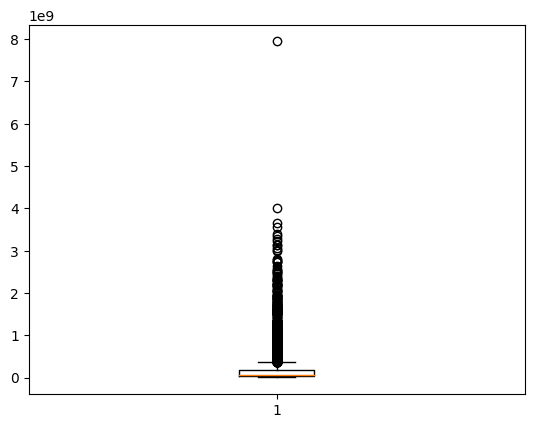

In [141]:
q1 = cost['R1400']['value'].quantile(.25)
q3 = cost['R1400']['value'].quantile(.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(lower_bound, upper_bound)

print((len(cost['R1400'][cost['R1400']['value'] > upper_bound]) / len(cost['R1400']))*100)

plt.boxplot(cost['R1400']['value'])
plt.show()

In [142]:
cost['R1400']

,Address,value
0,20001383919,520292940
1,20001383923,112480000
2,20001383925,79647552
3,20001383929,38494776
4,20001383932,98822000
...,...,...
18365,23006709820,98890000
18366,23006709823,62119000
18367,23006709826,438877000
18368,23006709827,102924000


In [143]:
print(r1400['R1400P3S01'].code.value_counts())
print('----------------------------------')
print(r1400['R1400P3S02'].code.value_counts())
print('----------------------------------')
print(r1400['R1400P3S03'].code.value_counts())

#P3S02 --> drug

code
11731    17016
11724    16578
11732    16392
11441    14822
11231    14521
         ...  
11933        7
11238        6
11239        4
11318        2
11319        1
Name: count, Length: 194, dtype: int64
----------------------------------
code
22111    1658
22113    1193
Name: count, dtype: int64
----------------------------------
code
31317    4743
31251    1591
31212    1232
31216    1192
31222    1134
         ... 
31237       9
31258       8
31213       5
31257       3
31214       2
Name: count, Length: 81, dtype: int64


***  محاسبه مجموع هزینه های غیر خوراکی ***

In [144]:
food_cost = {k : pd.DataFrame() for k in file_names}
food_cost['R1400'] = pd.DataFrame(cost_sheet_divided['R1400']['R1400P3S01'].groupby('Address').agg({'value' : 'sum'})).reset_index()
food_cost['R1400'].columns = ['Address', 'value']
food_cost['R1400']

,Address,value
0,20001383919,13051000
1,20001383923,39670000
2,20001383925,19360000
3,20001383929,22626000
4,20001383932,47132000
...,...,...
18276,23006709820,40390000
18277,23006709823,20529000
18278,23006709826,16407000
18279,23006709827,13404000


In [145]:
print(f"intersection = {len(set(list(food_cost['R1400'].Address)) & set(list(cost['R1400'].Address)))}")
print(f"len cost.Address = {len(cost['R1400'].Address)}")
print(f"len food_cost.Address = {len(food_cost['R1400'].Address)}")

intersection = 18281
len cost.Address = 18370
len food_cost.Address = 18281


In [146]:
total_cost = {k : pd.DataFrame() for k in file_names}
total_cost['R1400'] = pd.merge(cost['R1400'], food_cost['R1400'], how = 'outer', on = 'Address', )
total_cost['R1400'].columns = ['Address', 'total_cost', 'edible_cost']
total_cost['R1400'].loc[(total_cost['R1400']['total_cost'].isna()) | (total_cost['R1400']['edible_cost'].isna())]

,Address,total_cost,edible_cost
876,20102398535,7000000,NaN
877,20102398620,9000000,NaN
878,20102398622,31714000,NaN
903,20103399125,11000000,NaN
916,20104399330,5150000,NaN
...,...,...,...
17618,22907696023,3114388,NaN
17658,22908696723,8382388,NaN
17959,23002701926,20000000,NaN
17988,23002702435,15000000,NaN


Filling None value with median

In [147]:
total_cost_median = total_cost['R1400'][~total_cost['R1400'].isna()].median()
total_cost['R1400'].fillna(total_cost_median, inplace = True)

In [148]:
total_cost['R1400']['inedible_cost'] = total_cost['R1400']['total_cost'] - total_cost['R1400']['edible_cost']
total_cost['R1400']

,Address,total_cost,edible_cost,inedible_cost
0,20001383919,520292940,13051000.0,507241940.0
1,20001383923,112480000,39670000.0,72810000.0
2,20001383925,79647552,19360000.0,60287552.0
3,20001383929,38494776,22626000.0,15868776.0
4,20001383932,98822000,47132000.0,51690000.0
...,...,...,...,...
18365,23006709820,98890000,40390000.0,58500000.0
18366,23006709823,62119000,20529000.0,41590000.0
18367,23006709826,438877000,16407000.0,422470000.0
18368,23006709827,102924000,13404000.0,89520000.0


In [149]:
print(f"percentage of family with negative inedible_cost = {len(total_cost['R1400'].loc[total_cost['R1400']['inedible_cost'] < 0]) / len(total_cost['R1400']) * 100}")

percentage of family with negative inedible_cost = 0.391943385955362


In [150]:
save_excel(total_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Total Cost For Each Family R1400', 'xlsx')

OSError: Cannot save file into a non-existent directory: 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data'

***  محاسبه مجموع هزینه های حمل و نقل ***

In [ ]:
transportaion_codes = [71, 72, 72]
transportaion_cost = {k : pd.DataFrame() for k in file_names}

for code in transportaion_codes:
    new_cost = pd.DataFrame(r1400['R1400P3S13'][r1400['R1400P3S13']['code'].astype('str').str.startswith(f'{code}')])
    transportaion_cost['R1400'] = pd.concat([transportaion_cost['R1400'], new_cost])

transportaion_cost['R1400']

,Address,code,value
750,10001001920,71314,500000
913,10005004613,71116,45000000
939,10009008508,71311,2000000
1090,10012010120,71116,850000000
1580,10010008920,71311,11000000
...,...,...,...
246267,13001375923,72119,2500000
246268,13001375923,72122,18000000
246285,13001369614,72117,4500000
246286,13001369614,72119,1000000


In [ ]:
transportaion_cost['R1400'] = pd.DataFrame(transportaion_cost['R1400'].groupby('Address').agg({'value' : 'sum'})).reset_index()
transportaion_cost['R1400'].columns = ['Address', 'value']
transportaion_cost['R1400']

,Address,value
0,10001000111,21400000
1,10001000117,21360000
2,10001000123,20800000
3,10001000211,4800000
4,10001000214,21100000
...,...,...
10720,13006383611,8100000
10721,13006383620,9600000
10722,13006383623,15700000
10723,13006383820,17900000


In [ ]:
save_excel(transportaion_cost, 'C:/Python/Quera/Quera_Projects/FirstProject/Project1_data', 'Transportation Cost R1400', 'xlsx')